In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [2]:
train_data = pd.read_csv("C:/Users/goggi/OneDrive/Desktop/House_price/train.csv")
df=pd.read_csv("C:/Users/goggi/OneDrive/Desktop/House_price/train.csv")

In [3]:
# Load the testing data set
test_data = pd.read_csv("C:/Users/goggi/OneDrive/Desktop/House_price/test.csv")

In [4]:
# Data exploration
print(train_data.shape) # (1460, 81)
print(train_data.head())
print(train_data.describe())
print(train_data.info())

(1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008  

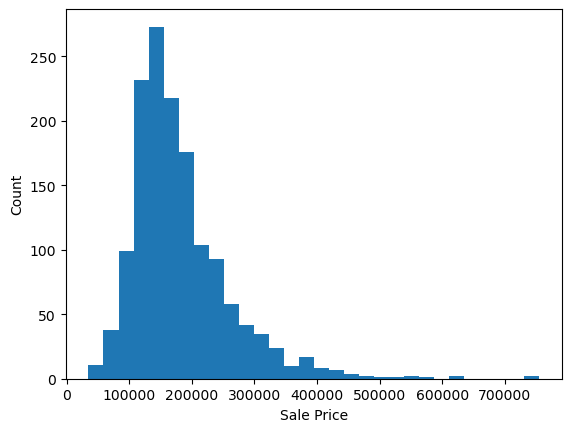

In [5]:
# View the distribution of the target variable
plt.hist(train_data['SalePrice'], bins=30)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

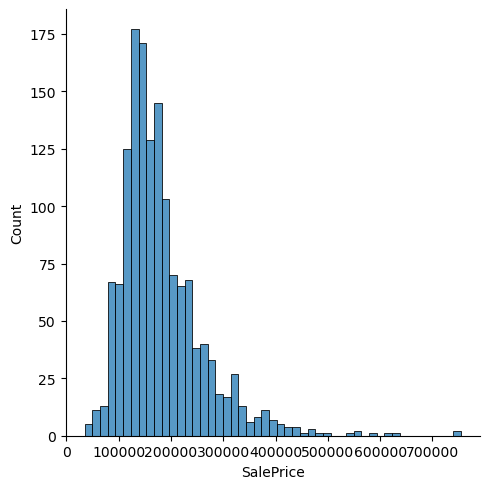

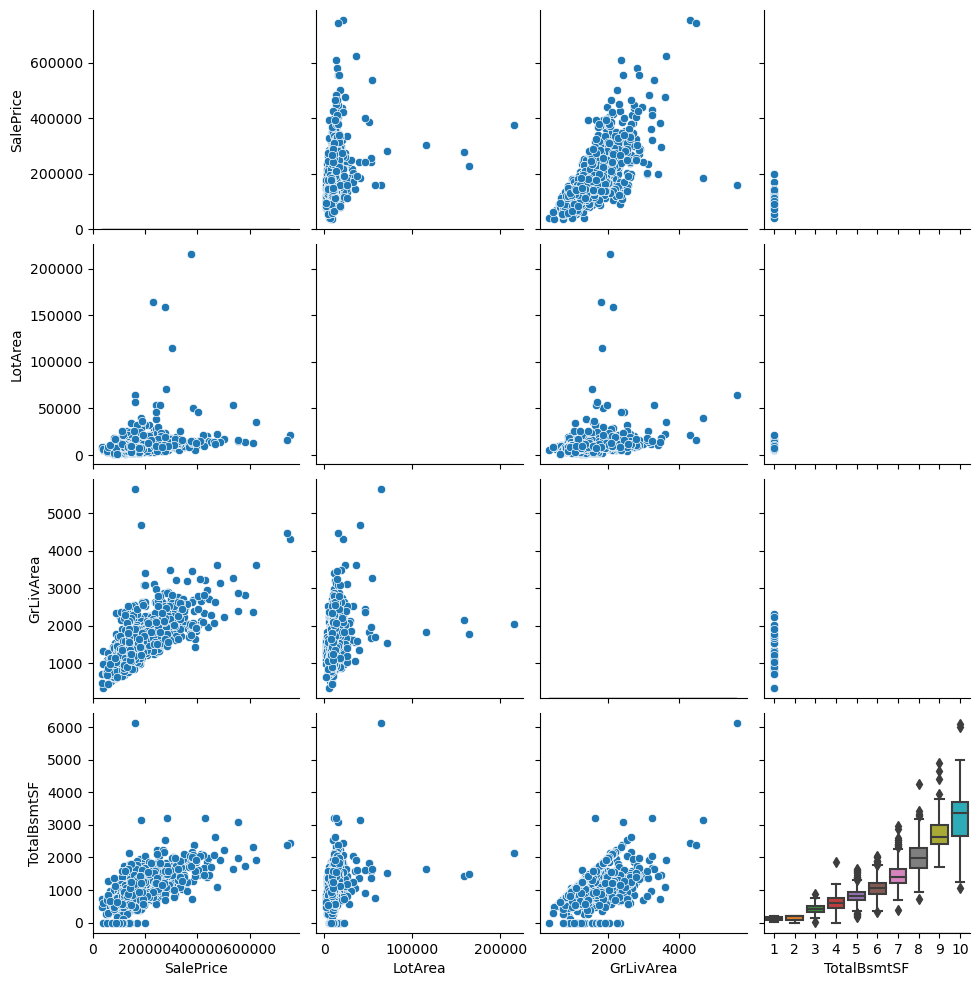

In [6]:
# Distribution of target variable
sns.displot(train_data['SalePrice'])

# Relationship between target variable and numerical features
sns.pairplot(train_data[['SalePrice', 'LotArea', 'GrLivArea', 'TotalBsmtSF']])

# Relationship between target variable and categorical features
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data)

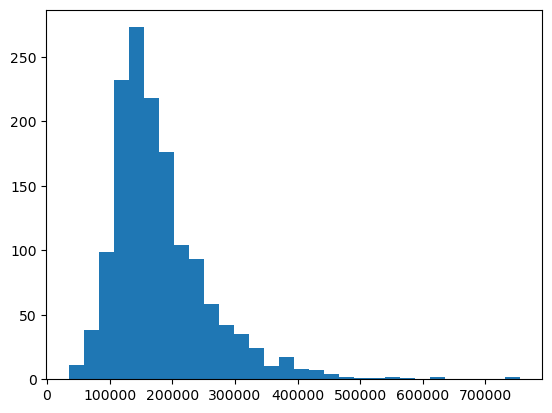

In [7]:
# Check the distribution of the target variable
plt.hist(train_data['SalePrice'], bins=30)
plt.show()

In [8]:
# Feature engineering
train_data['Age'] = train_data['YrSold'] - train_data['YearBuilt']
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [9]:
# Data transforming
num_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                'ScreenPorch', 'PoolArea', 'MiscVal', 'Age', 'TotalSF']

cat_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
                'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 
                'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 
                'SaleType', 'SaleCondition']

In [10]:
# Define the features and target variable
features = ['Id','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','KitchenAbvGr','BsmtUnfSF','YrSold'
            ,'1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','GarageYrBlt']
target = 'SalePrice'

In [11]:
# Split the data into training and validation sets
train_set = train_data.sample(frac=0.8, random_state=42)
valid_set = train_data.drop(train_set.index)

In [12]:
# Preprocess the data to handle missing values
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_set[features])
train_set[features] = imputer.transform(train_set[features])
valid_set[features] = imputer.transform(valid_set[features])

In [13]:
# Create a random forest classifier
rfc = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
# Train the classifier on the training set
rfc.fit(train_set[features], train_set[target])

RandomForestRegressor(random_state=42)

In [15]:
# Train the classifier on the training set
rfc.fit(train_set[features], train_set[target])

RandomForestRegressor(random_state=42)

In [16]:
# Make predictions on the validation set
valid_pred = rfc.predict(valid_set[features])

In [17]:
# Calculate the mean squared error
mse = mean_squared_error(valid_set[target], valid_pred)
print("Mean squared error:", mse)

Mean squared error: 578773606.320422


In [18]:
# Preprocess the testing data to handle missing values
test_data[features] = imputer.transform(test_data[features])

In [19]:
# Make predictions on the testing set
test_pred = rfc.predict(test_data[features])

In [20]:
# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test_data.Id, 'price': test_pred})
output.to_csv("C:/Users/goggi/OneDrive/Desktop/House_price/submission.csv", index=False)

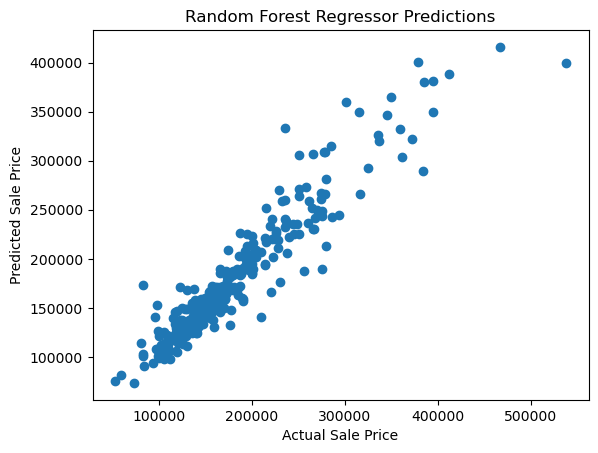

In [21]:
# Plot the predicted values against the actual target values in the validation set
plt.scatter(valid_set[target], valid_pred)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Random Forest Regressor Predictions')
plt.show()